In [27]:
# Import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from Library.sb_utils import save_file

In [28]:
pd.options.display.max_columns = 1000

In [98]:
# Import learning modules
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [31]:
# Read file
df = pd.read_csv('Data/Written_essay_scores_cleaned.csv')

In [32]:
df.head()

,Code,Content (/12),Organization (/12),Vocabulary (/12),Language Use (/12),Mechanics (/12),Total 1 (%),Total 2 (Weighted %),Country,PTJ1 (wds),SMK1 (wds),Sex,Age,Grade/Degree,Major/ Occupation,Acad. Genre,VST,CEFR,INTM,INSM,INTM+INSM,INTM-INSM,Primary,Secondary,College,Inschool,Outschool,Listening,Reading,Speaking,Writing,NS,Pronunciation,Presentation,EssayW,CEE,TOEIC,ONET,CEE_isna,ONET_isna,TOEIC_isna
0,W_CHN_001,9.5,8.0,8.0,6.5,8.0,66.65,64.55,CHN,271,219,F,20,2.0,Law,Social Sciences,30.0,B1_1,0.00,0.00,0.00,0.00,2.0,3.63,4.25,3.89,3.56,4.00,4.50,3.50,3.75,4.0,5.0,5.0,4.0,72.0,0.0,0.0,False,True,True
1,W_CHN_002,9.0,8.5,9.0,8.0,9.0,72.50,68.75,CHN,203,292,F,21,3.0,Law,Social Sciences,27.0,B1_1,4.17,4.33,8.50,-0.16,2.5,4.00,1.86,3.00,2.88,3.00,3.00,2.75,3.33,3.0,3.0,3.0,3.0,77.0,0.0,0.0,False,True,True
2,W_CHN_003,9.0,8.5,8.0,8.5,8.0,70.00,67.55,CHN,238,250,F,20,3.0,Law,Social Sciences,32.0,B1_1,5.17,5.17,10.34,0.00,3.5,4.25,4.25,4.22,4.11,5.00,4.00,3.75,4.25,4.0,5.0,5.0,5.0,79.0,0.0,0.0,False,True,True
3,W_CHN_004,8.5,9.0,7.5,8.5,9.5,71.70,66.90,CHN,269,230,F,20,2.0,Chemistry,Sciences & Technology,37.0,B1_2,4.67,5.17,9.84,-0.50,1.0,2.75,4.25,3.44,3.00,3.75,3.75,3.25,3.25,3.0,5.0,5.0,5.0,87.0,0.0,0.0,False,True,True
4,W_CHN_005,9.5,8.5,9.5,10.0,8.5,76.65,73.95,CHN,225,208,M,20,2.0,Chemistry,Sciences & Technology,44.0,B1_2,5.17,5.33,10.50,-0.16,2.0,3.63,4.88,4.33,3.67,5.00,5.00,3.25,3.75,3.0,5.0,5.0,5.0,84.0,0.0,0.0,False,True,True


In [33]:
df.columns

Index(['Code', 'Content (/12)', 'Organization (/12)', 'Vocabulary (/12)',
       'Language Use (/12)', 'Mechanics (/12)', 'Total 1 (%)',
       'Total 2 (Weighted %)', 'Country', 'PTJ1 (wds)', 'SMK1 (wds)', 'Sex',
       'Age', 'Grade/Degree', 'Major/ Occupation', 'Acad. Genre', 'VST',
       'CEFR', 'INTM', 'INSM', 'INTM+INSM', 'INTM-INSM', 'Primary',
       'Secondary', 'College', 'Inschool', 'Outschool', 'Listening', 'Reading',
       'Speaking', 'Writing', 'NS', 'Pronunciation', 'Presentation', 'EssayW',
       'CEE', 'TOEIC', 'ONET', 'CEE_isna', 'ONET_isna', 'TOEIC_isna'],
      dtype='object')

In [34]:
# Motivations scores highly correlated and redundant. Keep just one. Weighted total is a competing target variable. Drop that one too
df = df.drop(['INTM', 'INSM', 'INTM-INSM', 'Total 2 (Weighted %)'], axis=1)

In [35]:
df.columns

Index(['Code', 'Content (/12)', 'Organization (/12)', 'Vocabulary (/12)',
       'Language Use (/12)', 'Mechanics (/12)', 'Total 1 (%)', 'Country',
       'PTJ1 (wds)', 'SMK1 (wds)', 'Sex', 'Age', 'Grade/Degree',
       'Major/ Occupation', 'Acad. Genre', 'VST', 'CEFR', 'INTM+INSM',
       'Primary', 'Secondary', 'College', 'Inschool', 'Outschool', 'Listening',
       'Reading', 'Speaking', 'Writing', 'NS', 'Pronunciation', 'Presentation',
       'EssayW', 'CEE', 'TOEIC', 'ONET', 'CEE_isna', 'ONET_isna',
       'TOEIC_isna'],
      dtype='object')

In [36]:
df.dtypes

Code                   object
Content (/12)         float64
Organization (/12)    float64
Vocabulary (/12)      float64
Language Use (/12)    float64
Mechanics (/12)       float64
Total 1 (%)           float64
Country                object
PTJ1 (wds)              int64
SMK1 (wds)              int64
Sex                    object
Age                     int64
Grade/Degree          float64
Major/ Occupation      object
Acad. Genre            object
VST                   float64
CEFR                   object
INTM+INSM             float64
Primary               float64
Secondary             float64
College               float64
Inschool              float64
Outschool             float64
Listening             float64
Reading               float64
Speaking              float64
Writing               float64
NS                    float64
Pronunciation         float64
Presentation          float64
EssayW                float64
CEE                   float64
TOEIC                 float64
ONET      

In [75]:
# Convert booleans to ints to suppress errors later
for col in ['CEE_isna', 'ONET_isna', 'TOEIC_isna']:
    df[col] = df[col].astype(int)

In [76]:
df.dtypes

Code                   object
Content (/12)         float64
Organization (/12)    float64
Vocabulary (/12)      float64
Language Use (/12)    float64
Mechanics (/12)       float64
Total 1 (%)           float64
Country                object
PTJ1 (wds)              int64
SMK1 (wds)              int64
Sex                    object
Age                     int64
Grade/Degree          float64
Major/ Occupation      object
Acad. Genre            object
VST                   float64
CEFR                   object
INTM+INSM             float64
Primary               float64
Secondary             float64
College               float64
Inschool              float64
Outschool             float64
Listening             float64
Reading               float64
Speaking              float64
Writing               float64
NS                    float64
Pronunciation         float64
Presentation          float64
EssayW                float64
CEE                   float64
TOEIC                 float64
ONET      

In [77]:
# For EDA - scatter plots of each independent variable to dependent variable
def scatterplots(columns, y_col, data, ncol=None, figsize=(15,8)) :
    if ncol == None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = y_col, data = data, alpha=0.5)
        ax.set(xlabel=col, ylabel=y_col)
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [78]:
# List of dependent variable. As of yet no feature engineering with categorical columns, only numeric.
X_cols = ['PTJ1 (wds)', 'SMK1 (wds)', 'Age', 'Grade/Degree', 'VST',
       'INTM+INSM', 'Primary', 'Secondary', 'College', 'Inschool',
       'Outschool', 'Listening', 'Reading', 'Speaking', 'Writing', 'NS',
       'Pronunciation', 'Presentation', 'EssayW', 'CEE', 'TOEIC', 'ONET', 'CEE_isna', 'ONET_isna', 'TOEIC_isna']

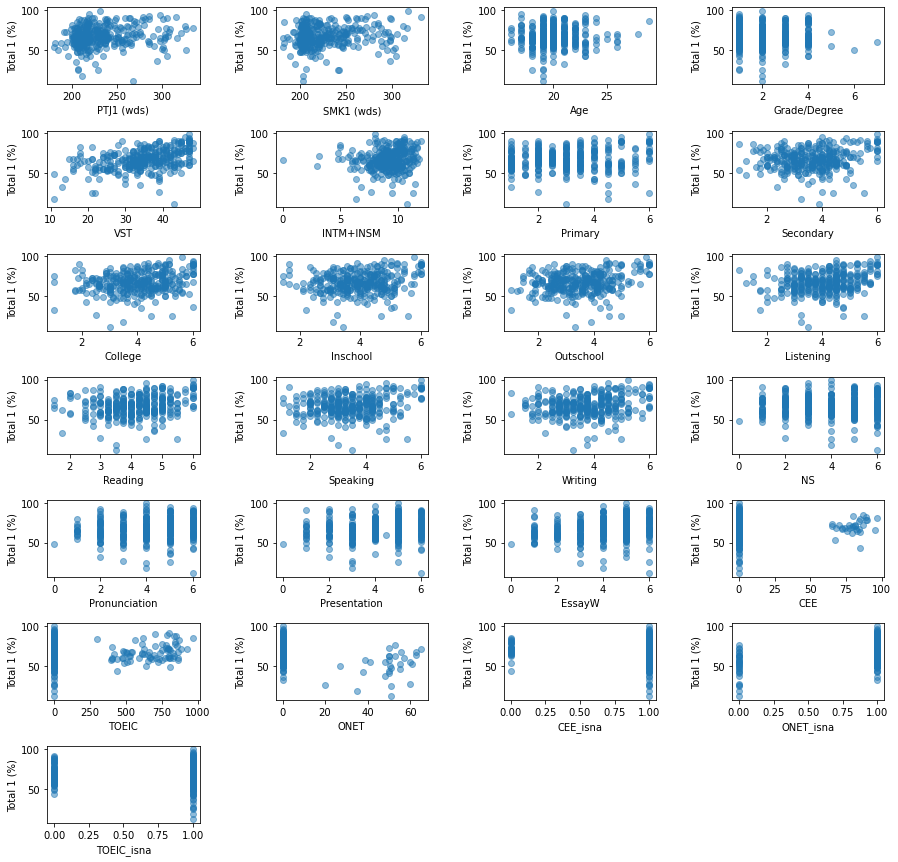

In [79]:
# EDA - plotted
scatterplots(columns = X_cols, y_col = 'Total 1 (%)', data = df, ncol=4, figsize=(15,15))

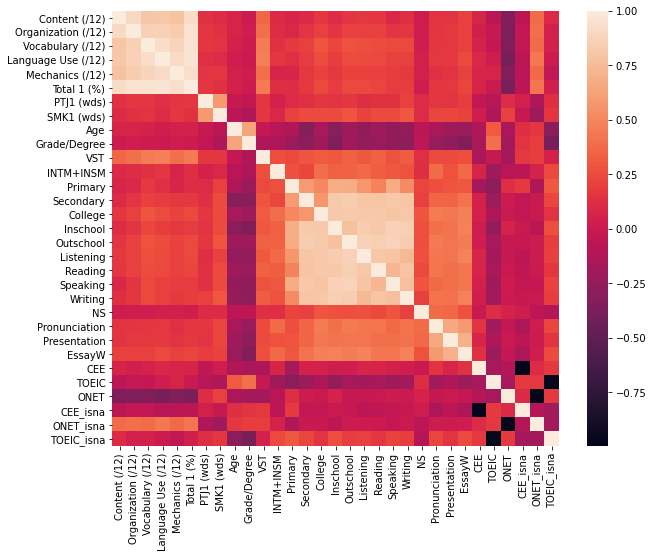

In [80]:
# Also EDA - heatmap
_ = plt.subplots(figsize=(10,8))
_ = sns.heatmap(df.corr())

In [81]:
# Subset X and y
X = df[X_cols]
y = df.loc[:, 'Total 1 (%)'].values

In [82]:
X.dtypes

PTJ1 (wds)         int64
SMK1 (wds)         int64
Age                int64
Grade/Degree     float64
VST              float64
INTM+INSM        float64
Primary          float64
Secondary        float64
College          float64
Inschool         float64
Outschool        float64
Listening        float64
Reading          float64
Speaking         float64
Writing          float64
NS               float64
Pronunciation    float64
Presentation     float64
EssayW           float64
CEE              float64
TOEIC            float64
ONET             float64
CEE_isna           int32
ONET_isna          int32
TOEIC_isna         int32
dtype: object

In [83]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75)
X = sm.add_constant(X)

In [84]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(type(X_train), type(X_test), type(y_train), type(y_test))

(240, 25) (81, 25) (240,) (81,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [85]:
# First model - multivariate linear regression
OLSmodel = sm.OLS(y_train, X_train)
rModel = OLSmodel.fit()
rModel.params

PTJ1 (wds)         0.018751
SMK1 (wds)         0.017766
Age                0.040815
Grade/Degree       1.041473
VST                0.528126
INTM+INSM         -0.924551
Primary          -48.720151
Secondary        -69.909059
College          -69.462499
Inschool         222.599396
Outschool        222.511242
Listening        -63.946903
Reading          -62.097909
Speaking         -63.221687
Writing          -65.229081
NS                -0.445585
Pronunciation     -0.879253
Presentation      -0.297384
EssayW             1.129431
CEE               -0.108509
TOEIC             -0.002067
ONET               0.774892
CEE_isna         -14.895598
ONET_isna         53.960380
TOEIC_isna         1.219092
dtype: float64

In [86]:
rModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              402.3
Date:                Thu, 02 Sep 2021   Prob (F-statistic):                   7.57e-166
Time:                        09:06:41   Log-Likelihood:                         -891.28
No. Observations:                 240   AIC:                                      1833.
Df Residuals:                     215   BIC:                                      1920.
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
PTJ1 (wds)        0.0188      0.029      0.650      0.516      -0.038       0.076
SMK1 (wds)        0.0178      0.029      0.608      0.544      -0.040       0.075
Age               0.0408      0.470      0.087      0.931      -0.885       0.966
Grade/Degree      1.0415      0.881      1.182      0.239      -0.695       2.778
VST               0.5281      0.103      5.110      0.000       0.324       0.732
INTM+INSM        -0.9246      0.568     -1.627      0.105      -2.044       0.195
Primary         -48.7202     37.778     -1.290      0.199    -123.183      25.743
Secondary       -69.9091     69.470     -1.006      0.315    -206.838      67.020
College         -69.4625     69.377     -1.001      0.318    -206.209      67.284
Inschool        222.5994    169.961      1.310      0.192    -112.404     557.603
Outschool       222.5112    169.886      1.310      0.192    -112.345     557.367
Listening       -63.9469     64.275     -0.995      0.321    -190.636      62.742
Reading         -62.0979     64.263     -0.966      0.335    -188.764      64.569
Speaking        -63.2217     64.243     -0.984      0.326    -189.849      63.405
Writing         -65.2291     64.102     -1.018      0.310    -191.577      61.119
NS               -0.4456      0.504     -0.883      0.378      -1.440       0.549
Pronunciation    -0.8793      0.743     -1.184      0.238      -2.343       0.585
Presentation     -0.2974      0.792     -0.375      0.708      -1.859       1.264
EssayW            1.1294      0.805      1.404      0.162      -0.457       2.715
CEE              -0.1085      0.173     -0.627      0.531      -0.449       0.232
TOEIC            -0.0021      0.009     -0.219      0.827      -0.021       0.017
ONET              0.7749      0.192      4.027      0.000       0.396       1.154
CEE_isna        -14.8956     13.624     -1.093      0.275     -41.749      11.958
ONET_isna        53.9604      9.626      5.605      0.000      34.986      72.935
TOEIC_isna        1.2191      6.642      0.184      0.855     -11.872      14.310
==============================================================================
Omnibus:                        6.811   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                7.727
Skew:                          -0.264   Prob(JB):                       0.0210
Kurtosis:                       3.703   Cond. No.                     1.62e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition n

In [88]:
# Training prediction for OLS multi-linreg
y_tr_pred = rModel.predict(X_train)
y_tr_pred

231    78.178266
176    66.711236
126    65.373304
93     70.116128
146    71.364913
         ...    
316    70.177626
169    69.416820
187    66.399479
141    74.410730
193    66.074682
Length: 240, dtype: float64

In [89]:
# Test prediction for OLS multi-linreg
y_te_pred = rModel.predict(X_test)
y_te_pred

254    60.450451
137    65.906141
96     71.085299
67     65.743959
28     71.989292
         ...    
188    72.635489
117    68.140053
210    74.205908
3      73.595988
91     63.844591
Length: 81, dtype: float64

In [202]:
# For plotting performance of model versus actual
def pred_plot(y_pred, y_act, figsize=(8,6)):
    sns.set()
    fig, ax = plt.subplots(figsize=(8,6))

    ax.scatter(y_pred, y_act, color='b', label='predicted')
    ax.plot(y_act, y_act, marker='.', linestyle='-', color='r', label='perfect "model"')

    ax.set_xlabel('predicted')
    ax.set_ylabel('actual')
    ax.legend()

    plt.show()

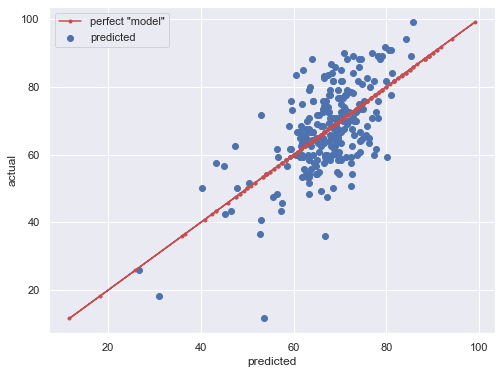

In [203]:
# Training set performance
pred_plot(y_tr_pred, y_train)

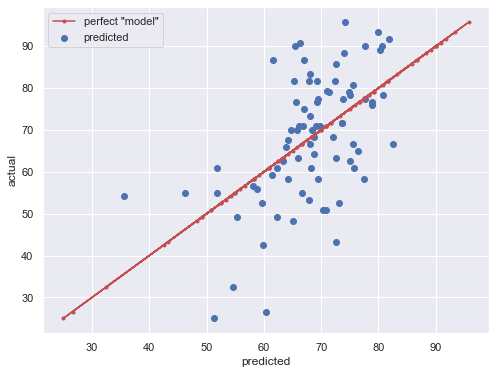

In [204]:
# Test set performance
pred_plot(y_te_pred, y_test)

In [205]:
# R^2 scores
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.39521758101867577, 0.29668770021939384)

In [206]:
# Pipeline for linear regression, for selecting best number of features to feed into linreg
pipe = make_pipeline(SelectKBest(f_regression), LinearRegression())

In [210]:
# For displaying CV result statistics
def cv_score_summary(cv_results):
    cv_scores = cv_results['test_score']
    print("CV scores are: ", cv_scores)
    print("Mean and std CV scores: ", np.mean(cv_scores), np.std(cv_scores))
    print("95% confidence interval for CV scores: ", 
          np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2))

In [211]:
# 5-fold CV, cross-validation scores
cv_results = cross_validate(pipe, X_train, y_train, cv=5)

In [212]:
cv_score_summary(cv_results)

CV scores are:  [0.31382799 0.36721653 0.24670283 0.16727659 0.17295194]
Mean and std CV scores:  0.25359517642771834 0.0781531040132334
95% confidence interval for CV scores:  [0.1  0.41]


In [124]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'linearregression', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [213]:
# Set up for selecting best number of variables for linreg
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [214]:
# 5-fold CV Grid Search re: number of independent variables
lr_grid_cv = GridSearchCV(pipe, param_grid = grid_params, cv=5, n_jobs=-1)

In [215]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x00000145D9DD6430>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25]})

In [217]:
# Grid Search summary stats
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [218]:
# Best number of k's
lr_grid_cv.best_params_

{'selectkbest__k': 4}

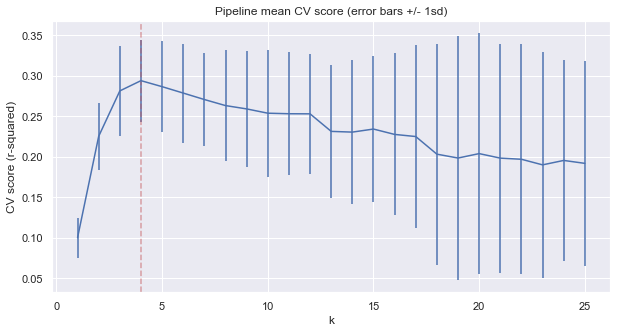

In [219]:
# Visually plotting best number of k's
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [221]:
# Optimal columns for best linreg fit: selected
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
X_train.columns[selected]

Index(['VST', 'Outschool', 'ONET', 'ONET_isna'], dtype='object')

In [222]:
# Coefficients of regression: coefs; column names: features
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

ONET_isna    55.982820
Outschool     2.012441
ONET          0.824259
VST           0.409170
dtype: float64

In [223]:
# Subset training and testing sets for columns of interest
X_train_lr = X_train[features]
X_test_lr = X_test[features]

In [226]:
# Define the optimized linreg model with four features
OLSmodel_lr = sm.OLS(y_train, X_train_lr)
lr_model = OLSmodel_lr.fit()
lr_model.params

VST           0.402980
Outschool     1.875177
ONET          0.670671
ONET_isna    48.144186
dtype: float64

In [225]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              2500.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):                   7.64e-192
Time:                        11:04:00   Log-Likelihood:                         -902.92
No. Observations:                 240   AIC:                                      1814.
Df Residuals:                     236   BIC:                                      1828.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
VST            0.4030      0.090      4.486      0.000       0.226       0.580
Outschool      1.8752      0.674      2.782      0.006       0.547       3.203
ONET           0.6707      0.071      9.406      0.000       0.530       0.811
ONET_isna     48.1442      3.312     14.534      0.000      41.619      54.670
==============================================================================
Omnibus:                       10.394   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               13.026
Skew:                          -0.346   Prob(JB):                      0.00148
Kurtosis:                       3.908   Cond. No.                         178.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
# Predict training set
y_tr_lr_pred = lr_model.predict(X_train_lr)
y_tr_lr_pred

231    75.654175
176    68.343547
126    66.617651
93     72.776327
146    70.244472
         ...    
316    71.754539
169    73.122320
187    65.192883
141    74.201096
193    65.595863
Length: 240, dtype: float64

In [228]:
y_te_lr_pred = lr_model.predict(X_test_lr)
y_te_lr_pred

254    61.582013
137    68.492829
96     69.673092
67     68.435841
28     63.488668
         ...    
188    70.574276
117    68.080290
210    75.007056
3      68.679980
91     69.701769
Length: 81, dtype: float64

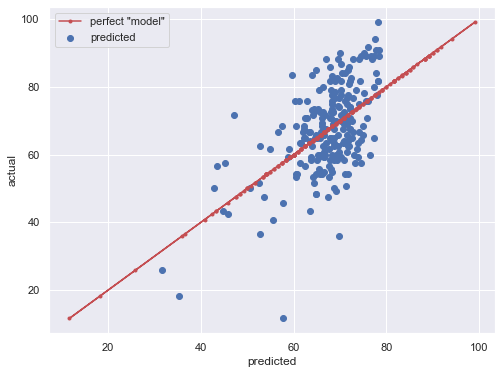

In [229]:
# Training set performance
pred_plot(y_tr_lr_pred, y_train)

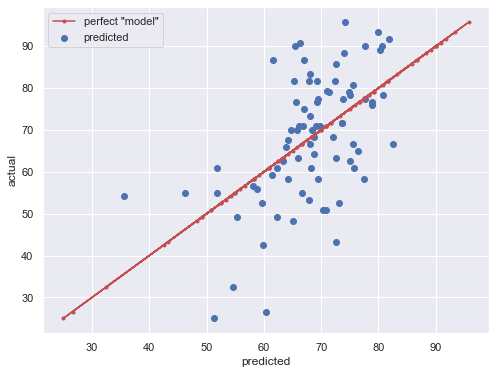

In [230]:
# Testing set performance
pred_plot(y_te_pred, y_test)

In [231]:
# Define two pipelines for Random Forest, one with scaler(rf_pipe_wSc), and one without (rf_pipe)
rf_pipe = make_pipeline(RandomForestRegressor())
rf_pipe_wSc = make_pipeline(StandardScaler(), RandomForestRegressor())

In [232]:
# 5-fold CV results from both pipelines
rf_default_cv_results = cross_validate(rf_pipe, X_train, y_train, cv=5)
rfs_default_cv_results = cross_validate(rf_pipe_wSc, X_train, y_train, cv=5)

In [241]:
# Show cv score statistics
print("Without scaling: ")
cv_score_summary(rf_default_cv_results)
print("\nWith scaling: ")
cv_score_summary(rfs_default_cv_results)

# Without scaling is slightly better. Will progress with it.

Without scaling: 
CV scores are:  [0.29800099 0.32056097 0.21943821 0.1811951  0.23839005]
Mean and std CV scores:  0.2515170631210588 0.05113583176291299
95% confidence interval for CV scores:  [0.15 0.35]

With scaling: 
CV scores are:  [0.26753106 0.32050419 0.19769652 0.17770639 0.23392338]
Mean and std CV scores:  0.239472309832668 0.05088122521393248
95% confidence interval for CV scores:  [0.14 0.34]


In [236]:
# Define grid number of estimators: grid_params
grid_params = { 'randomforestregressor__n_estimators': [int(n) for n in np.logspace(start=1, stop=3, num=20)] }
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000]}

In [237]:
# 5-fold CV Grid Search with # of estimators
rf_grid_cv = GridSearchCV(rf_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [238]:
# Fit with training set
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000]})

In [239]:
# Best number of estimators: 20
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 379}

In [243]:
# 5-fold CV with optimal number of estimators in Random Forest
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)

In [245]:
# Summary statistics for RF model
cv_score_summary(rf_best_cv_results)

# CV scores are nearly identical to linreg - maybe slightly tighter

CV scores are:  [0.29670092 0.29740379 0.23048182 0.17928622 0.26118249]
Mean and std CV scores:  0.253011047970213 0.04447293127253346
95% confidence interval for CV scores:  [0.16 0.34]


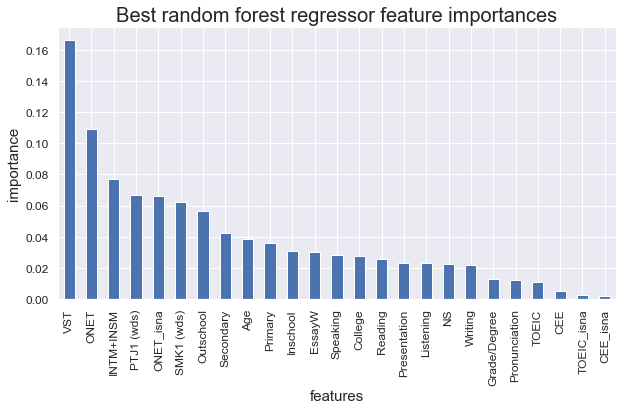

In [246]:
# Plot importance of features
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar', fontsize=12)
plt.xlabel('features', fontsize=15)
plt.ylabel('importance', fontsize=15)
plt.title('Best random forest regressor feature importances', fontsize=20);

In [247]:
rf_model = RandomForestRegressor(n_estimators=20)

In [248]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20)

In [250]:
# Predictions for training and test sets
y_tr_rf_pred = rf_model.predict(X_train)
y_te_rf_pred = rf_model.predict(X_test)

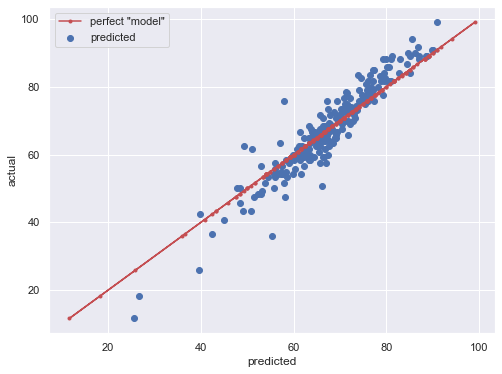

In [251]:
# Plot Training set results. Very nicely fitted - much better than linreg.
pred_plot(y_tr_rf_pred, y_train)

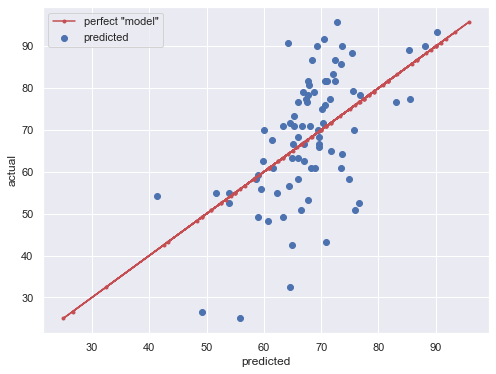

In [253]:
# Plot testing set results. Much worse performance in the testing set, not much better than linreg. 
# Very overfitted. May just need more data, or more optimization of parameters.
pred_plot(y_te_rf_pred, y_test)